<a href="https://colab.research.google.com/github/liamkessler12/L_kess/blob/main/youtube_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

In [ ]:
pd = files.upload()

Saving UScomments.csv to UScomments.csv


In [3]:
comments=pd.read_csv(r'/content/UScomments.csv', error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
comments.head()

unnamed_cols  =  comments.columns.str.contains('Unnamed')
unnamed_cols

array([False, False, False, False])

In [5]:
comments = comments.drop(comments[comments.columns[unnamed_cols]], axis=1)

comments.head()


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [6]:
## lets find out missing values in your data
comments.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [ ]:
### lets perform sentiment analysis using TextBlob  

In [7]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from textblob import TextBlob

In [9]:
TextBlob('Say hi to Kong and maverick for me').sentiment.polarity

0.0

In [10]:
df=comments[0:1000]

In [11]:
polarity=[]
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [12]:
print(polarity[0:50])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573, 0.0, 0.2, -0.023333333333333352, 0.5, 0.0, 0.8, -0.2916666666666667, 0.0, 0.25, -0.8, 0.0, 0.0, 0.65, 0.0, 0.375, 0.0, 0.0, 0.5, -0.04999999999999999, 0.34448051948051944, 0.5, 0.6, 0.0, 0.0, -0.30625, 0.28828125, -0.36458333333333337, 0.5, 0.012499999999999997, 0.11904761904761905, 0.16666666666666666, 0.0, -0.4, -0.125, -0.07142857142857142, 0.40727272727272723, 0.0, 0.35, 0.0, -0.03415584415584416]


In [13]:
comments.shape

(691400, 4)

In [14]:
comments.head(10)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0


In [15]:
comments['polarity']=polarity

In [16]:
comments.head(12)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [ ]:
### Lets perform EDA for the Positve sentences

In [17]:
comments_positive=comments[comments['polarity']==1]

In [18]:
comments_negative=comments[comments['polarity']==-1]

In [19]:
comments_negative.head(2)

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0


In [ ]:
## wordcloud analysis of data

In [20]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from wordcloud import WordCloud , STOPWORDS

In [22]:
comments_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [23]:
total_comments=' '.join(comments_negative['comment_text'])

In [24]:
total_comments[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

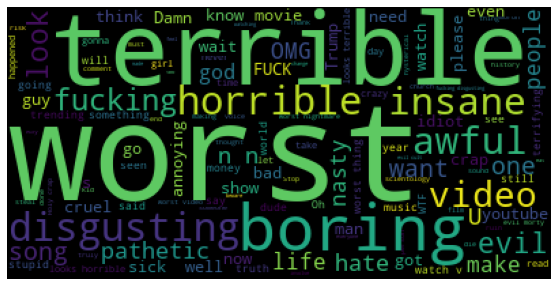

In [25]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

plt.savefig('file.png',dpi=300)

In [ ]:
### Conclusion-->> Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

In [ ]:
### Lets perform EDA for the Positive sentences

In [26]:
total_comments2=' '.join(comments_positive['comment_text'])

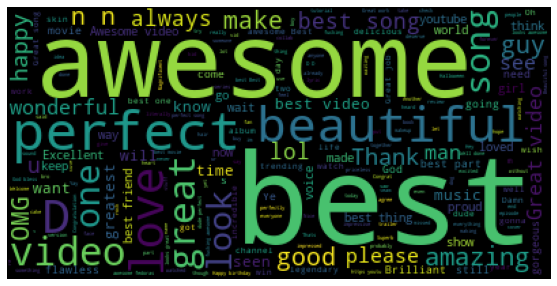

In [27]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('file.png',dpi=300)

In [ ]:
## Emoji Analysis of data

In [28]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
!pip install emoji==0.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import emoji

In [31]:
comments.head(50)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [32]:
print('\U0001F600')

😀


In [ ]:
### lets extract emoji from below comment

In [33]:
comment='The girl with the dog was kylie Jenner 😂'

In [34]:
comment=comments["comment_text"][41]
comment

'The girl with the dog was kylie Jenner 😂'

In [35]:
[c for c  in comment if c in emoji.UNICODE_EMOJI]

['😂']

In [46]:
len(emoji_list)

32426

In [47]:
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [ ]:
### NOw we have to compute frequencies of each & every emojis..

In [42]:
from collections import Counter

In [43]:
Counter(emoji_list).most_common(10)

[('😂', 4129),
 ('❤', 3474),
 ('😍', 3221),
 ('😬', 1045),
 ('😭', 791),
 ('🔥', 733),
 ('👏', 691),
 ('💕', 671),
 ('👍', 553),
 ('😘', 543)]

In [44]:
Counter(emoji_list).most_common(10)[0][0]

'😂'

In [45]:
Counter(emoji_list).most_common(10)[1][0]

'❤'

In [48]:
emojis=[Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [49]:
emojis

['😂', '❤', '😍', '😬', '😭', '🔥', '👏', '💕', '👍', '😘']

In [50]:
freqs=[Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [51]:
freqs

[4129, 3474, 3221, 1045, 791, 733, 691, 671, 553, 543]

In [52]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
import plotly.graph_objs as go

In [54]:
from plotly.offline import iplot

In [55]:
trace=go.Bar(x=emojis,y=freqs)

In [143]:
iplot([trace])



In [ ]:
## Collect entire data of Youtube !

In [56]:
import os

In [57]:
path=r'/content/drive/MyDrive/additional_data'

In [58]:
files=os.listdir(path)

In [59]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DE_category_id.json',
 'DEvideos.csv',
 'FR_category_id.json',
 'FRvideos.csv',
 'GB_category_id.json',
 'GBvideos.csv',
 'IN_category_id.json',
 'INvideos.csv',
 'JP_category_id.json',
 'JPvideos.csv',
 'KR_category_id.json',
 'KRvideos.csv',
 'MXvideos.csv',
 'MX_category_id.json',
 'RU_category_id.json',
 'RUvideos.csv',
 'US_category_id.json',
 'USvideos.csv']

In [60]:
for i in range(1,len(files),2):
    print(i)

1
3
5
7
9
11
13
15
17
19


In [61]:
i=1
while i<= 19:
  print(i)
  i=i+2

1
3
5
7
9
11
13
15
17
19


In [62]:
files_csv=[files[i] for i in range(0,len(files),2)]

In [63]:
files_csv

['CAvideos.csv',
 'DE_category_id.json',
 'FR_category_id.json',
 'GB_category_id.json',
 'IN_category_id.json',
 'JP_category_id.json',
 'KR_category_id.json',
 'MXvideos.csv',
 'RU_category_id.json',
 'US_category_id.json']

In [64]:

full_df=pd.DataFrame()

for file in files_csv:
    current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',error_bad_lines=False)
    
    current_df['country']=file.split('.')[0][0:2]
    full_df=pd.concat([full_df,current_df])

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





In [65]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,{
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10.0,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,NaN
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,NaN
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,NaN
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,NaN


In [66]:
full_df.shape

(83862, 18)

In [ ]:
##Which Category has the maximum likes ?

In [67]:
full_df['category_id'].unique()

array([10., 23., 24., 25., 22., 26.,  1., 28., 20., 17., 29., 15., 19.,
        2., 27., 43., 30., nan])

In [122]:
cat = pd.read_csv(r'/category_file.csv').set_index('category_id')

In [123]:
cat.reset_index(inplace=True)

In [124]:
cat.columns=['category_id','Category_name']

In [125]:
cat.set_index('category_id',inplace=True)

In [126]:
cat

,Category_name
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging


In [79]:
cat.to_dict()

{'category_id': {0: 1,
  1: 2,
  2: 10,
  3: 15,
  4: 17,
  5: 18,
  6: 19,
  7: 20,
  8: 21,
  9: 22,
  10: 23,
  11: 24,
  12: 25,
  13: 26,
  14: 27,
  15: 28,
  16: 29,
  17: 30,
  18: 31,
  19: 32,
  20: 33,
  21: 34,
  22: 35,
  23: 36,
  24: 37,
  25: 38,
  26: 39,
  27: 40,
  28: 41,
  29: 42,
  30: 43,
  31: 44},
 'Category_name': {0: ' Film & Animation',
  1: ' Autos & Vehicles',
  2: ' Music',
  3: ' Pets & Animals',
  4: ' Sports',
  5: ' Short Movies',
  6: ' Travel & Events',
  7: ' Gaming',
  8: ' Videoblogging',
  9: ' People & Blogs',
  10: ' Comedy',
  11: ' Entertainment',
  12: ' News & Politics',
  13: ' Howto & Style',
  14: ' Education',
  15: ' Science & Technology',
  16: ' Nonprofits & Activism',
  17: ' Movies',
  18: ' Anime/Animation',
  19: ' Action/Adventure',
  20: ' Classics',
  21: ' Comedy',
  22: ' Documentary',
  23: ' Drama',
  24: ' Family',
  25: ' Foreign',
  26: ' Horror',
  27: ' Sci-Fi/Fantasy',
  28: ' Thriller',
  29: ' Shorts',
  30: ' Sho

In [80]:
dct=cat.to_dict()

In [81]:
dct['Category_name']

{0: ' Film & Animation',
 1: ' Autos & Vehicles',
 2: ' Music',
 3: ' Pets & Animals',
 4: ' Sports',
 5: ' Short Movies',
 6: ' Travel & Events',
 7: ' Gaming',
 8: ' Videoblogging',
 9: ' People & Blogs',
 10: ' Comedy',
 11: ' Entertainment',
 12: ' News & Politics',
 13: ' Howto & Style',
 14: ' Education',
 15: ' Science & Technology',
 16: ' Nonprofits & Activism',
 17: ' Movies',
 18: ' Anime/Animation',
 19: ' Action/Adventure',
 20: ' Classics',
 21: ' Comedy',
 22: ' Documentary',
 23: ' Drama',
 24: ' Family',
 25: ' Foreign',
 26: ' Horror',
 27: ' Sci-Fi/Fantasy',
 28: ' Thriller',
 29: ' Shorts',
 30: ' Shows',
 31: ' Trailers            '}

In [82]:
full_df['category_name']=full_df['category_id'].map(dct['Category_name'])

In [83]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', '{',
       'category_name'],
      dtype='object')

In [84]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,{,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10.0,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,NaN,Comedy
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,NaN,Drama
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,NaN,Drama


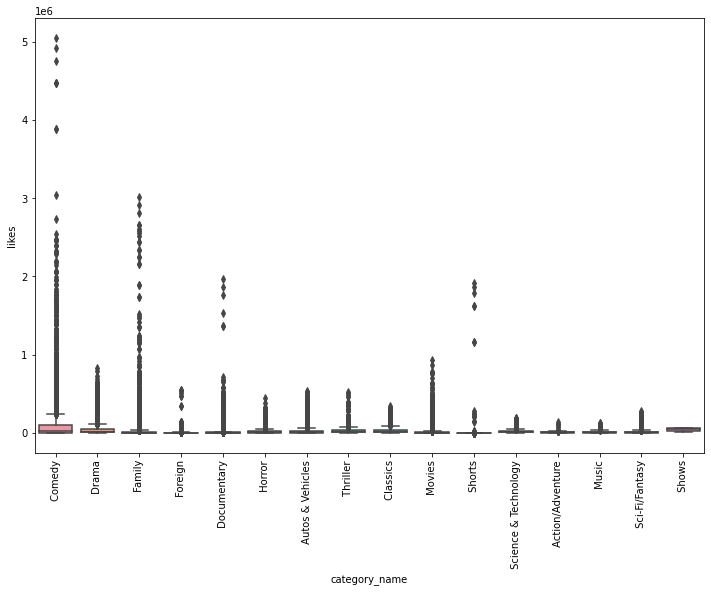

In [85]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='likes',data=full_df)
plt.xticks(rotation='vertical')
plt.savefig('file.png',dpi=300)

In [86]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', '{',
       'category_name'],
      dtype='object')

In [87]:
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100

In [88]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,country,{,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10.0,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,...,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,NaN,Comedy,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,...,False,False,False,STill got a lot of packages. Probably will las...,CA,NaN,Drama,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,...,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,NaN,Drama,4.575843,0.167292,0.256342


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

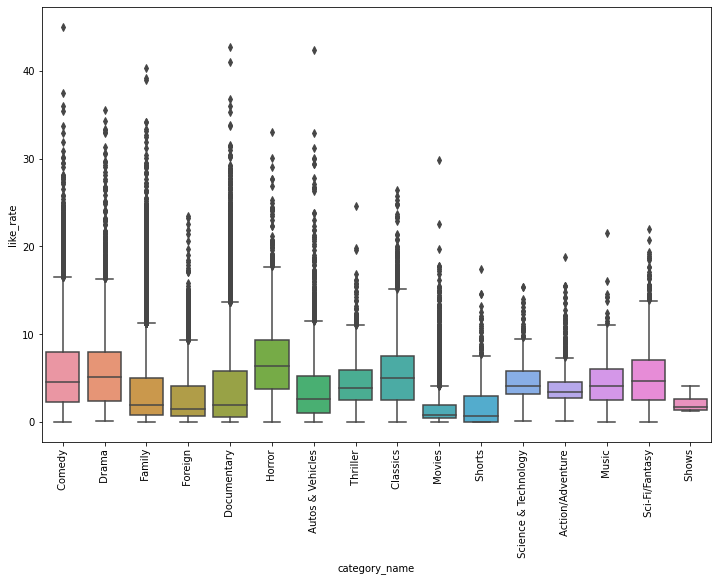

In [89]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='like_rate',data=full_df)
plt.xticks(rotation='vertical')

In [ ]:
### analysing relationship between views & likes

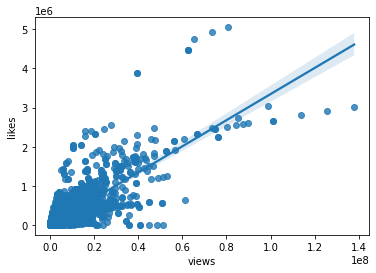

In [90]:
sns.regplot(data=full_df,x='views',y='likes')

In [ ]:
### finding co-relation values between ['views', 'likes', 'dislikes']

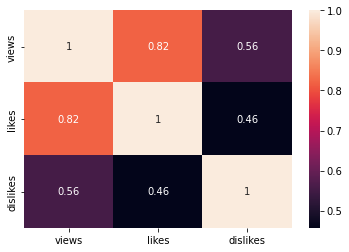

In [91]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(),annot=True)

In [92]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,country,{,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10.0,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,...,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,NaN,Comedy,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,...,False,False,False,STill got a lot of packages. Probably will las...,CA,NaN,Drama,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,...,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,NaN,Drama,4.575843,0.167292,0.256342


In [ ]:
###Which channels have the largest number of trending videos?

In [93]:
cdf = full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})

In [94]:
cdf

,channel_title,total_videos
0,FBE,248
1,The Late Show with Stephen Colbert,242
2,REACT,238
3,Philip DeFranco,218
4,Late Night with Seth Meyers,200
...,...,...
11321,Lo Mejor de Dragon Ball,1
11322,Lo Mas Viral,1
11323,Lng/SHT,1
11324,Lloyd 2.0,1


In [95]:
import plotly.express as px

In [129]:
px.bar(data_frame=cdf[0:20],x='channel_title',y='total_videos')


In [ ]:
###Does Punctuations in title and tags have any relation with views, likes, dislikes comments?

In [97]:
import string

In [98]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [99]:
def punc_count(x):
    return len([c for c in x if c in string.punctuation])

In [100]:
full_df['title'][0]

0    Eminem - Walk On Water (Audio) ft. BeyoncÃ©
0                 CapÃ­tulo 12 | MasterChef 2017
Name: title, dtype: object

In [101]:
text='Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [102]:
punc_count(text)

4

In [103]:
sample=full_df[0:10000]

In [104]:
sample['count_punc'] = sample['title'].apply(punc_count)

<ipython-input-104-9a111d5d73a5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:
sample.head()
 

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,country,{,category_name,like_rate,dislike_rate,comment_count_rate,count_punc
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10.0,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,...,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,NaN,Comedy,4.589104,0.253051,0.733639,4
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,...,False,False,STill got a lot of packages. Probably will las...,CA,NaN,Drama,12.594873,0.166363,1.284185,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,...,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,NaN,Drama,4.575843,0.167292,0.256342,3
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,...,False,False,I know it's been a while since we did this sho...,CA,NaN,Family,6.309630,0.094903,0.835851,3
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,...,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,NaN,Comedy,4.874563,0.062887,0.253752,3


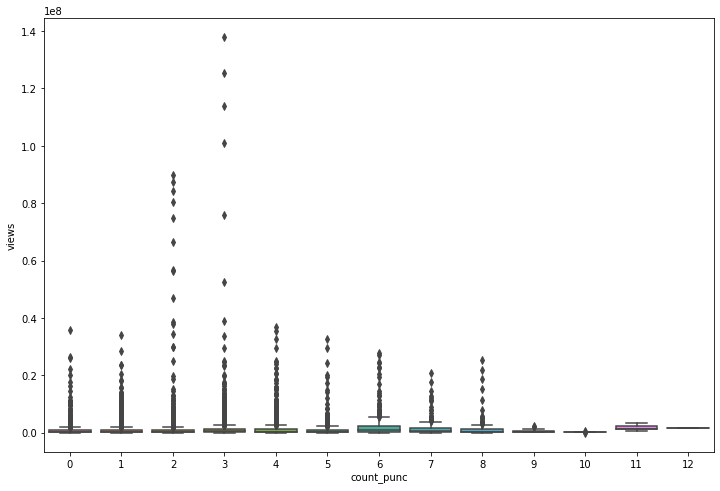

In [141]:
plt.figure(figsize=(12,8))
sns.boxplot(x='count_punc',y='views',data=sample)

In [142]:
sample['count_punc'].corr(sample['views'])

0.06510009783044858